In [93]:
# utilities
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:
df =pd.read_csv("ElectronicsProductsPricingData.csv")
df.head()

,id,prices.amountMax,prices.amountMin,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.shipping,...,name,primaryCategories,sourceURLs,upc,weight,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,AVphzgbJLJeJML43fA0o,104.99,104.99,Yes,New,USD,"2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...",False,Bestbuy.com,NaN,...,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics,https://www.amazon.com/Sanus-VLF410B1-10-Inch-...,7.94E+11,32.8 pounds,NaN,NaN,NaN,NaN,NaN
1,AVpgMuGwLJeJML43KY_c,69.00,64.99,In Stock,New,USD,2017-12-14T06:00:00Z,True,Walmart.com,Expedited,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
2,AVpgMuGwLJeJML43KY_c,69.00,69.00,In Stock,New,USD,2017-09-08T05:00:00Z,False,Walmart.com,Expedited,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
3,AVpgMuGwLJeJML43KY_c,69.99,69.99,Yes,New,USD,2017-10-10T05:00:00Z,False,Bestbuy.com,NaN,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN
4,AVpgMuGwLJeJML43KY_c,66.99,66.99,Yes,New,USD,2017-08-28T07:00:00Z,False,Bestbuy.com,NaN,...,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds,NaN,NaN,NaN,NaN,NaN


DATA PREPROCESSING

In [95]:
df.columns

Index(['id', 'prices.amountMax', 'prices.amountMin', 'prices.availability',
       'prices.condition', 'prices.currency', 'prices.dateSeen',
       'prices.isSale', 'prices.merchant', 'prices.shipping',
       'prices.sourceURLs', 'asins', 'brand', 'categories', 'dateAdded',
       'dateUpdated', 'ean', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'primaryCategories', 'sourceURLs', 'upc',
       'weight', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30'],
      dtype='object')

In [96]:
df.shape

(7249, 31)

Data Cleaning

Handling NA values

In [97]:
#dropping empty columns
df = df.drop(['Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30'],axis='columns')
df.head()

,id,prices.amountMax,prices.amountMin,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.shipping,...,ean,imageURLs,keys,manufacturer,manufacturerNumber,name,primaryCategories,sourceURLs,upc,weight
0,AVphzgbJLJeJML43fA0o,104.99,104.99,Yes,New,USD,"2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...",False,Bestbuy.com,NaN,...,NaN,https://images-na.ssl-images-amazon.com/images...,sanusvlf410b110inchsuperslimfullmotionmountfor...,NaN,VLF410B1,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics,https://www.amazon.com/Sanus-VLF410B1-10-Inch-...,7.94E+11,32.8 pounds
1,AVpgMuGwLJeJML43KY_c,69.00,64.99,In Stock,New,USD,2017-12-14T06:00:00Z,True,Walmart.com,Expedited,...,NaN,https://images-na.ssl-images-amazon.com/images...,boytone2500w21chhometheatersystemblackdiamond/...,Boytone,BT-210F,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds
2,AVpgMuGwLJeJML43KY_c,69.00,69.00,In Stock,New,USD,2017-09-08T05:00:00Z,False,Walmart.com,Expedited,...,NaN,https://images-na.ssl-images-amazon.com/images...,boytone2500w21chhometheatersystemblackdiamond/...,Boytone,BT-210F,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds
3,AVpgMuGwLJeJML43KY_c,69.99,69.99,Yes,New,USD,2017-10-10T05:00:00Z,False,Bestbuy.com,NaN,...,NaN,https://images-na.ssl-images-amazon.com/images...,boytone2500w21chhometheatersystemblackdiamond/...,Boytone,BT-210F,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds
4,AVpgMuGwLJeJML43KY_c,66.99,66.99,Yes,New,USD,2017-08-28T07:00:00Z,False,Bestbuy.com,NaN,...,NaN,https://images-na.ssl-images-amazon.com/images...,boytone2500w21chhometheatersystemblackdiamond/...,Boytone,BT-210F,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,http://reviews.bestbuy.com/3545/4784804/review...,6.42E+11,14 pounds


In [98]:
#dropping columns that we wont be utilizing
df = df.drop(['id', 'sourceURLs', 'prices.sourceURLs', 'imageURLs', 'ean', 'asins', 'upc', 'keys',
             'manufacturer', 'manufacturerNumber'], axis=1)

In [99]:
#checking for columns with there respective numbers of empty raw values
df.isnull().sum()

prices.amountMax          0
prices.amountMin          0
prices.availability       0
prices.condition          0
prices.currency           0
prices.dateSeen           0
prices.isSale             0
prices.merchant           0
prices.shipping        2972
brand                     0
categories                0
dateAdded                 0
dateUpdated               0
name                      0
primaryCategories         0
weight                    0
dtype: int64

In [100]:
#renaming the columns to make them less lengthy
df = df.rename(columns={'prices.amountMax':'MaxPrice', 'prices.amountMin':'MinPrice', 'prices.availability':'Availability', 
                        'prices.condition':'Condition', 'prices.currency':'Currency', 'prices.dateSeen':'DateSeen', 
                        'prices.isSale':'isSale', 'prices.merchant':'Merchant', 'prices.shipping':'Shipping', 'brand':'Brand',
                        'categories':'Categories', 'dateAdded':'DateAdded', 'dateUpdated':'DateUpdated', 'name':'Name', 
                        'weight':'Weight'})

Dealing with string values

In [101]:
#checking for unique values in Avalability column
df['Availability'].unique()

array(['Yes', 'In Stock', 'TRUE', 'undefined', 'yes', 'Out Of Stock',
       'Special Order', 'No', 'More on the Way', 'sold', 'FALSE',
       'Retired', '32 available', '7 available'], dtype=object)

from the above output we can note redudancy to deal with it we are going to do binary encoding to represent outstock:0 and instock:1

In [102]:
df['Availability'] = df ['Availability'].map({
    'Yes':1, 'In Stock':1, 'TRUE':1, 'undefined':0, 'yes':1, 'Out Of Stock':0,
       'Special Order':1, 'No':0, 'More on the Way':0, 'sold':0, 'FALSE':0,
       'Retired': 0, '32 available':1, '7 available' : 1
})

In [103]:
df['Condition'].unique()

array(['New', 'new', 'Seller refurbished', 'Used', 'pre-owned',
       'Refurbished', 'Manufacturer refurbished',
       'New other (see details)', 'refurbished',
       'New Kicker BT2 41IK5BT2V2 Wireless Bluetooth USB Audio System Black + Remote, Power Supply (volts, ampere): 24, 2.9, Square Reflex Subwoofer (in., mm): 6 x 6", Stereo Amp Power with DSP (watts): 50, App for customizing - KickStart, Remote Control Included, Height x Width x Depth (in, mm): 8.87" x 19" x 9.14", Frequency Response (Hz): 24-20k, +-3dB, Woofer (in., cm): 5", 1 Year Manufacturer Warranty, Item Weight: 13.85 lbs., USB Port, Compatible with: Bluetooth-enabled devices, Aux-in, Speaker Design: 2-Way Full-Range, Bluetooth wireless streaming, Condition: Brand New!, Tweeter (in., cm): 3/4"',
       '5/16" Ring Terminal, 3 ft. 8 GA Black Ground Cable, 6 ft. Split Loom Tubing, Depth: 6.5" (165mm) (top) 11.2" (285mm) (bottom), Item Weight: 18.5 lbs., Frequency Response 25Hz - 500Hz, Line Output, Max Power: 1100 Watt 

In [104]:
#binary encoding on condition column
df['Condition'] = df['Condition'].map({'New':1, 'new':1, 'Seller refurbished':0, 'Used':0, 'pre-owned':0, 'Refurbished':0, 
                               'Manufacturer refurbished':0, 'New other (see details)':1, 'refurbished':0, 
                               'New Kicker BT2 41IK5BT2V2 Wireless Bluetooth USB Audio System Black + Remote, Power Supply (volts, ampere): 24, 2.9, Square Reflex Subwoofer (in., mm): 6 x 6", Stereo Amp Power with DSP (watts): 50, App for customizing - KickStart, Remote Control Included, Height x Width x Depth (in, mm): 8.87" x 19" x 9.14", Frequency Response (Hz): 24-20k, +-3dB, Woofer (in., cm): 5", 1 Year Manufacturer Warranty, Item Weight: 13.85 lbs., USB Port, Compatible with: Bluetooth-enabled devices, Aux-in, Speaker Design: 2-Way Full-Range, Bluetooth wireless streaming, Condition: Brand New!, Tweeter (in., cm): 3/4"':1,
                               '5/16" Ring Terminal, 3 ft. 8 GA Black Ground Cable, 6 ft. Split Loom Tubing, Depth: 6.5" (165mm) (top) 11.2" (285mm) (bottom), Item Weight: 18.5 lbs., Frequency Response 25Hz - 500Hz, Line Output, Max Power: 1100 Watt x 1 Channel @ 2 Ohm, 30 ft. Speaker Wire, Boss Illuminated Logo, Height: 12.8" (325mm), (3) Rubber Grommets, Item Weight: 2 lbs., Size 10", 20 ft. 8 GA Red Power Cable, Ported enclosure for greater output and deeper bass, 2 Ohm Stable, Class A/B, Voice Coil Size 2", Black rubber surround, Nominal Impedance 4 ohm, Rugged fiberboard construction with thick carpet covering, Warranty: 1 Year Manufacturer Warranty, MOSFET Power, Weight: 6 lbs, Width: 17.7" (450mm), Condition: Brand New!, Low Pass Crossover, List item, RMS Power: 250 Watt x 1 Channel @ 4 Ohm, Remote Bass Control Included!, 1/4" Ring Terminal, 16 ft. 18 GA Blue Turn-On Wire, Peak Power: 500 Watts, Competition High Quality Fuse Holder, Condition: BRAND NEW!, Product Condition: Brand New, RMS Power: 175 Watts, Aluminum woofer cone, THD: 0.01%, 1 Year Manufacturer Warranty, Dimensions: 10-7/16" (W) x 2-1/4" (H) x 9-1/8" (L), #10 Ring Terminal, 20 ft. High Performance Black RCA, SPL (db @ 1w/1m) 88dB, New Dual SBX101 10" 500 Watts Car Audio Subwoofer Sub + Ported Sub Enclosure, (20) 4" Wire Ties':1})

In [105]:
df['isSale'] = df['isSale'].map({False:0, True:1})

In [106]:
#binary encoding on the shipping column and dealing with NA value
df['Shipping'] = df['Shipping'].fillna(0)
df['Shipping'] = df['Shipping'].map({'Expedited':1, 'Value':1, 'Standard':1, 'Free Shipping':0, 
                                     'Free Shippingon orders 35 and up':0, 'Free Expedited Shipping':0, 
                                     'Free Shipping on orders 35 and up':0, 'Free Expedited Shipping for most orders over $49':0, 
                                     'FREE':0, 'Freight':1, 'Free Shipping for this Item':0, 
                                     'Free Standard Shipping on Orders Over $49':0, 'Free Delivery':0, 
                                     'Shipping Charges Apply':1, 'Free Standard Shipping':0, 
                                     'Free Next Day Delivery (USA)':0}).fillna(1)

In [107]:
i = df[df['Weight']=='Electronics'].index
df = df.drop(i, axis=0)

In [108]:
i = df[df['Weight']=='http://www.walmart.com/ip/Kenwood-DDX9703S-6-95-Double-DIN-In-Dash-DVD-Receiver-with-Bluetooth-Apple-CarPlay-Android-Auto-HD-Radio-and-SiriusXM-Ready/54695274,https://www.amazon.com/Kenwood-DDX9703S-Stereo-Carplay-Android/dp/B01GITWG5S/,https://www.ebay.com/urw/product-reviews/6003304884?_itm=282520765993,https://www.ebay.com/urw/product-reviews/6003304884?_itm=272989525770,https://www.walmart.com/ip/Kenwood-DDX9703S-6-95-Double-DIN-In-Dash-DVD-Receiver-with-Bluetooth-Apple-CarPlay-Android-Auto-HD-Radio-and-SiriusXM-Ready/54695274,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded,https://www.bestbuy.com/site/kenwood-6-95-android-auto-apple-carplay-built-in-bluetooth-in-dash-cd-dvd-dm-receiver-black/4969400.p?skuId=4969400,http://www.ebay.com/itm/Kenwood-6-95-Android-Auto-Apple-CarPlay-Built-in-Bluetooth-In-Dash-/322229392622?hash=item4b065e54ee,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=28,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=27,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=24,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=26,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=20,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=25,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=22,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=21,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=23,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=16,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=19,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=18,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=17,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=15,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=13,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=14,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=12,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=11,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=7,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=5,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=8,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=10,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=2,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=9,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=6,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=3,http://reviews.bestbuy.com/3545/4969400/reviews.htm?format=embedded&page=4,http://www.ebay.com/itm/Kenwood-DDX9703S-2-DIN-DVD-CD-Player-6-95-LCD-Android-iPhone-HD-Radio-Bluetooth/182198714536,http://www.bestbuy.com/site/kenwood-6-95-android-auto-apple-carplay-built-in-bluetooth-in-dash-cd-dvd-dm-receiver-black/4969400.p?skuId=4969400,http://www.ebay.com/itm/Kenwood-DDX9703S-Double-2-DIN-DVD-CD-Player-Android-iPhone-HD-Radio-Bluetooth-/201635793843,http://www.ebay.com/itm/KENWOOD-DDX9703S-2-DIN-6-95-TV-DVD-CD-Player-Android-iPhone-HD-Radio-Bluetooth-/292166538126,http://www.ebay.com/itm/Kenwood-DDX9703S-CarPlay-Android-Stereo-2DIN-In-Dash-DVD-CD-AMFM-6-95-Touch-NEW-/132239386357,http://www.ebay.com/itm/Kenwood-DDX9703S-Double-2-DIN-DVD-CD-Player-Android-iPhone-HD-Radio-Bluetooth-/352086023468,http://www.ebay.com/itm/Kenwood-DDX9703S-Double-2-DIN-DVD-CD-Player-Android-iPhone-HD-Radio-Bluetooth-/201635793843?hash=item2ef26e0bb3:g:x7sAAOSwwo1Xfwa0&vxp=mtr,http://www.ebay.com/itm/Kenwood-DDX9703S-Double-2-DIN-DVD-CD-Player-Android-iPhone-HD-Radio-Bluetooth-/352086023468?hash=item51f9f65d2c:g:BJAAAOSw1~JZPvFJ,http://www.ebay.com/itm/Kenwood-DDX9703S-Double-2-DIN-DVD-CD-Player-Android-iPhone-HD-Radio-Bluetooth-/162546830375?hash=item25d88bcc27:g:~UIAAOSw8GtZOdR6,http://www.frys.com/product/8773411,http://frys.com/product/8773411,https://www.amazon.ca/Kenwood-DDX9703S-DVD-receiver/dp/B01GITWG5S,https://www.walmart.com/ip/Kenwood-DDX9703S-6.95-Double-DIN-In-Dash-DVD-Receiver-with-Bluetooth-Apple-CarPlay-Android-Auto-HD-Radio-and-SiriusXM-Ready/54695274'].index
df = df.drop(i, axis=0)

In [109]:
df.isnull().sum()

MaxPrice             0
MinPrice             0
Availability         0
Condition            0
Currency             0
DateSeen             0
isSale               0
Merchant             0
Shipping             0
Brand                0
Categories           0
DateAdded            0
DateUpdated          0
Name                 0
primaryCategories    0
Weight               0
dtype: int64

We've dealt with all null values lets now lets deal with data type errors 

In [110]:

df.dtypes


MaxPrice             float64
MinPrice             float64
Availability           int64
Condition              int64
Currency              object
DateSeen              object
isSale                 int64
Merchant              object
Shipping             float64
Brand                 object
Categories            object
DateAdded             object
DateUpdated           object
Name                  object
primaryCategories     object
Weight                object
dtype: object

In [111]:
#dealing with data type errors
# converting dates objects into real date format
df['DateAdded'] = df['DateAdded'].apply(lambda x: pd.to_datetime(x,errors='coerce',utc=True))
df['DateUpdated'] = df['DateUpdated'].apply(lambda x: pd.to_datetime(x,errors='coerce',utc=True))

In [112]:
# for `DateSeen' field, we need special function to parse this object 

from datetime import datetime, timezone
def dateCleaner(date):
    date = str(date).split(',')[0]
    cleaned_date = datetime.fromisoformat(date[:-1]).astimezone(timezone.utc)
    return cleaned_date
df['DateSeen'] = df['DateSeen'].map(dateCleaner)



In [113]:
df.head(2)



,MaxPrice,MinPrice,Availability,Condition,Currency,DateSeen,isSale,Merchant,Shipping,Brand,Categories,DateAdded,DateUpdated,Name,primaryCategories,Weight
0,104.99,104.99,1,1,USD,2017-03-30 03:00:00+00:00,0,Bestbuy.com,1.0,Sanus,"Audio & Video Accessories,TV Mounts,TV Accesso...",2015-04-13 12:00:51+00:00,2018-05-12 18:59:48+00:00,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics,32.8 pounds
1,69.00,64.99,1,1,USD,2017-12-14 03:00:00+00:00,1,Walmart.com,1.0,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18 14:14:56+00:00,2018-06-13 19:39:02+00:00,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,14 pounds


In [114]:
#putting harmony into the weights columns since it's stored as string and it contains both ounces and pounds.
def poundsToNum(pounds):
    if type(pounds)==str:   
        pounds = pounds.split()
        num = float(pounds[0])
        unit = pounds[-1]
        if unit in ['oz', 'ounces']:
            num = num/16
        pounds = num
    return pounds

In [115]:
df['Weight'] = df['Weight'].map(poundsToNum)

#fixing the shipping price column changing the format from float to 
integer since most nominal fields do have that

In [116]:
#shipping interger to float
df['Shipping'] = df['Shipping'].astype('int64')

In [117]:
#making a copy of df
df1 = df.copy()

In [118]:


# lets extract total days by substracting from base

from datetime import datetime

dat2 = df1.sort_values(by='DateSeen', ascending=False)
base = df1['DateSeen'].min() # base

df1['seenTotalDays'] = (dat2['DateSeen'] - base)



In [119]:
# also extract total years in fraction

from dateutil.relativedelta import relativedelta

# Assuming df1 is your DataFrame and 'dateSeen' is a datetime column

# Sort the DataFrame by 'DateSeen' in ascending order
dat2 = df1.sort_values(by='DateSeen', ascending=False)

# Find the earliest 'dateSeen' as the base date
base = dat2['DateSeen'].min()

# Calculate the difference in years as fractions
df1['seenTotalYears'] = df1['DateSeen'].apply(lambda x: relativedelta(x, base).years + relativedelta(x, base).months / 12.0)

# Now, df1['seenTotalYears'] contains the difference in years as fractions

In [120]:
# Also calculating average price using Max and Min price fields
df1['Average_Price'] = (df1['MaxPrice'] + df1['MinPrice'])/2

We are now done with our datapreprocessing this is our final result before we proceed to EDA

In [121]:
# mapping for primary categories
df1['primaryCategories'] = df1['primaryCategories'].map({
                            ' Siri Eyes Free':'Auto Electronics',
                            ' Apple CarPlay': 'Auto Electronics',
                            'Electronics,Furniture':'Multimedia Electronics',
                            'Electronics':'Multimedia Electronics',
                            ' Intel Celeron':'Computers'
})



In [122]:
df1.head(2)

,MaxPrice,MinPrice,Availability,Condition,Currency,DateSeen,isSale,Merchant,Shipping,Brand,Categories,DateAdded,DateUpdated,Name,primaryCategories,Weight,seenTotalDays,seenTotalYears,Average_Price
0,104.99,104.99,1,1,USD,2017-03-30 03:00:00+00:00,0,Bestbuy.com,1,Sanus,"Audio & Video Accessories,TV Mounts,TV Accesso...",2015-04-13 12:00:51+00:00,2018-05-12 18:59:48+00:00,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Multimedia Electronics,32.8,942 days 14:00:00,2.50,104.990
1,69.00,64.99,1,1,USD,2017-12-14 03:00:00+00:00,1,Walmart.com,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18 14:14:56+00:00,2018-06-13 19:39:02+00:00,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Multimedia Electronics,14.0,1201 days 14:00:00,3.25,66.995


In [123]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7216 entries, 0 to 7248
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   MaxPrice           7216 non-null   float64            
 1   MinPrice           7216 non-null   float64            
 2   Availability       7216 non-null   int64              
 3   Condition          7216 non-null   int64              
 4   Currency           7216 non-null   object             
 5   DateSeen           7216 non-null   datetime64[ns, UTC]
 6   isSale             7216 non-null   int64              
 7   Merchant           7216 non-null   object             
 8   Shipping           7216 non-null   int64              
 9   Brand              7216 non-null   object             
 10  Categories         7216 non-null   object             
 11  DateAdded          7216 non-null   datetime64[ns, UTC]
 12  DateUpdated        7216 non-null   datetime64[ns, UTC


Exploratory Data Analysis

Looking at the correlations of numeric data in a dataset using heatmap

<Axes: >

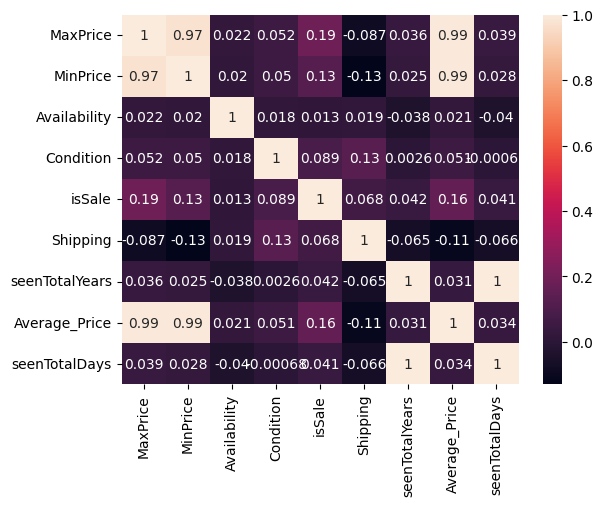

In [124]:


# heatmap for numeric data only
sub_df = df1.filter(['MaxPrice','MinPrice','Availability','Condition','isSale','Shipping','seenTotalYears','Average_Price','seenTotalDays'], axis=1)
corr = sub_df.corr()
sns.heatmap(corr, annot=True)



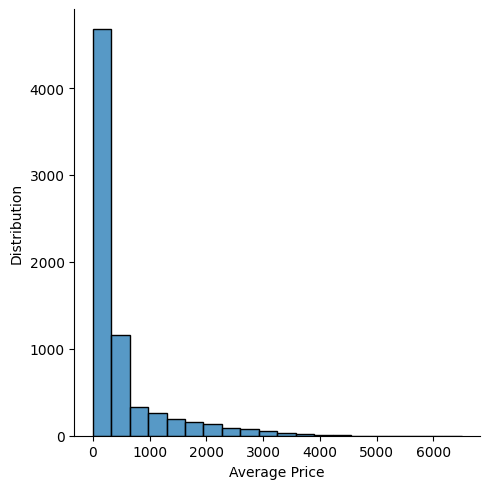

In [125]:
# price distribution
ax = sns.displot(data=df1,x='Average_Price',bins=20)
ax.set_axis_labels(x_var="Average Price", y_var='Distribution')



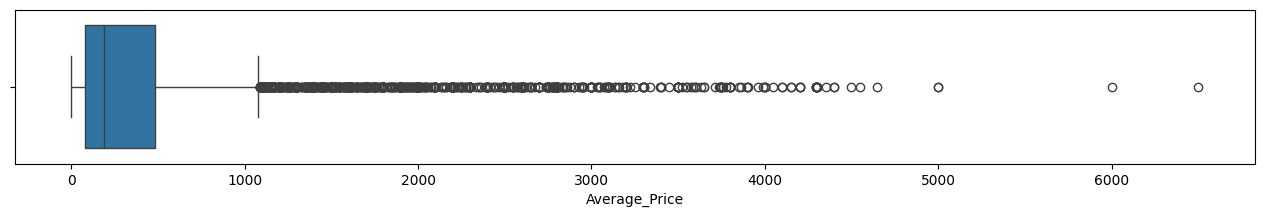

In [126]:
# boxplot
plt.figure(figsize=(16,2))
ax = sns.boxplot(data = df1, x='Average_Price')



We can see outliers but this is normal since product prices do vary

In [127]:
# labels of datasets
list_label = [x for x in df1.columns]
pd.Series(list_label)

0              MaxPrice
1              MinPrice
2          Availability
3             Condition
4              Currency
5              DateSeen
6                isSale
7              Merchant
8              Shipping
9                 Brand
10           Categories
11            DateAdded
12          DateUpdated
13                 Name
14    primaryCategories
15               Weight
16        seenTotalDays
17       seenTotalYears
18        Average_Price
dtype: object

<Figure size 1000x1500 with 0 Axes>

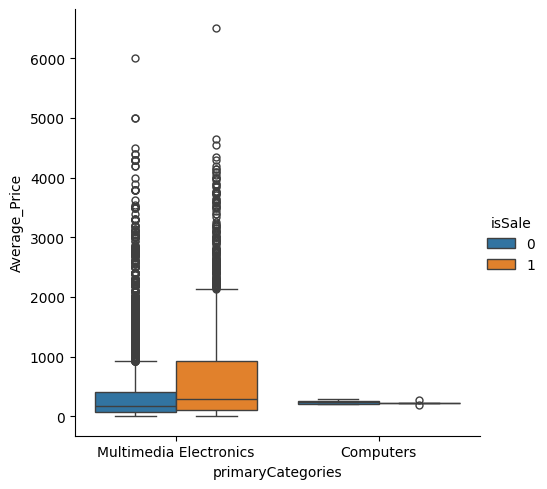

In [128]:
plt.figure(figsize=(10,15))
sns.catplot(data=df1,x='primaryCategories',y='Average_Price',kind='box',hue='isSale')

Multimedia Electronics: Products on sale generally have higher and more variable prices compared to those not on sale.
Computers: Prices are low and stable, with little difference between products on sale and those not on sale.

What is the competitive pricing strategy for the same product from different merchants

In [129]:
# lets clean our `Name` a bit
import re

pattern =r'^[A-Za-z\s]+ - '
df1['Name'] = df1["Name"].apply(lambda x: re.sub(pattern, '', x))

In [130]:
mercnets_ = df1[['Merchant','Name','Average_Price']] # selective fields
prduct_top = mercnets_.groupby('Name')['Average_Price'].agg('mean').sort_values(ascending=False).head(5).index #top products



In [131]:
# Initialize an empty dictionary to store the results
competitive_prices = {}

# Loop through the top 5 products
for i in range(5):
    # Filter and group by merchant, then calculate the mean price
    competitive_prices[f'competitive_pr{i}'] = (mercnets_[mercnets_['Name'] == prduct_top[i]]
                                                .groupby('Merchant')['Average_Price']
                                                .agg('mean'))


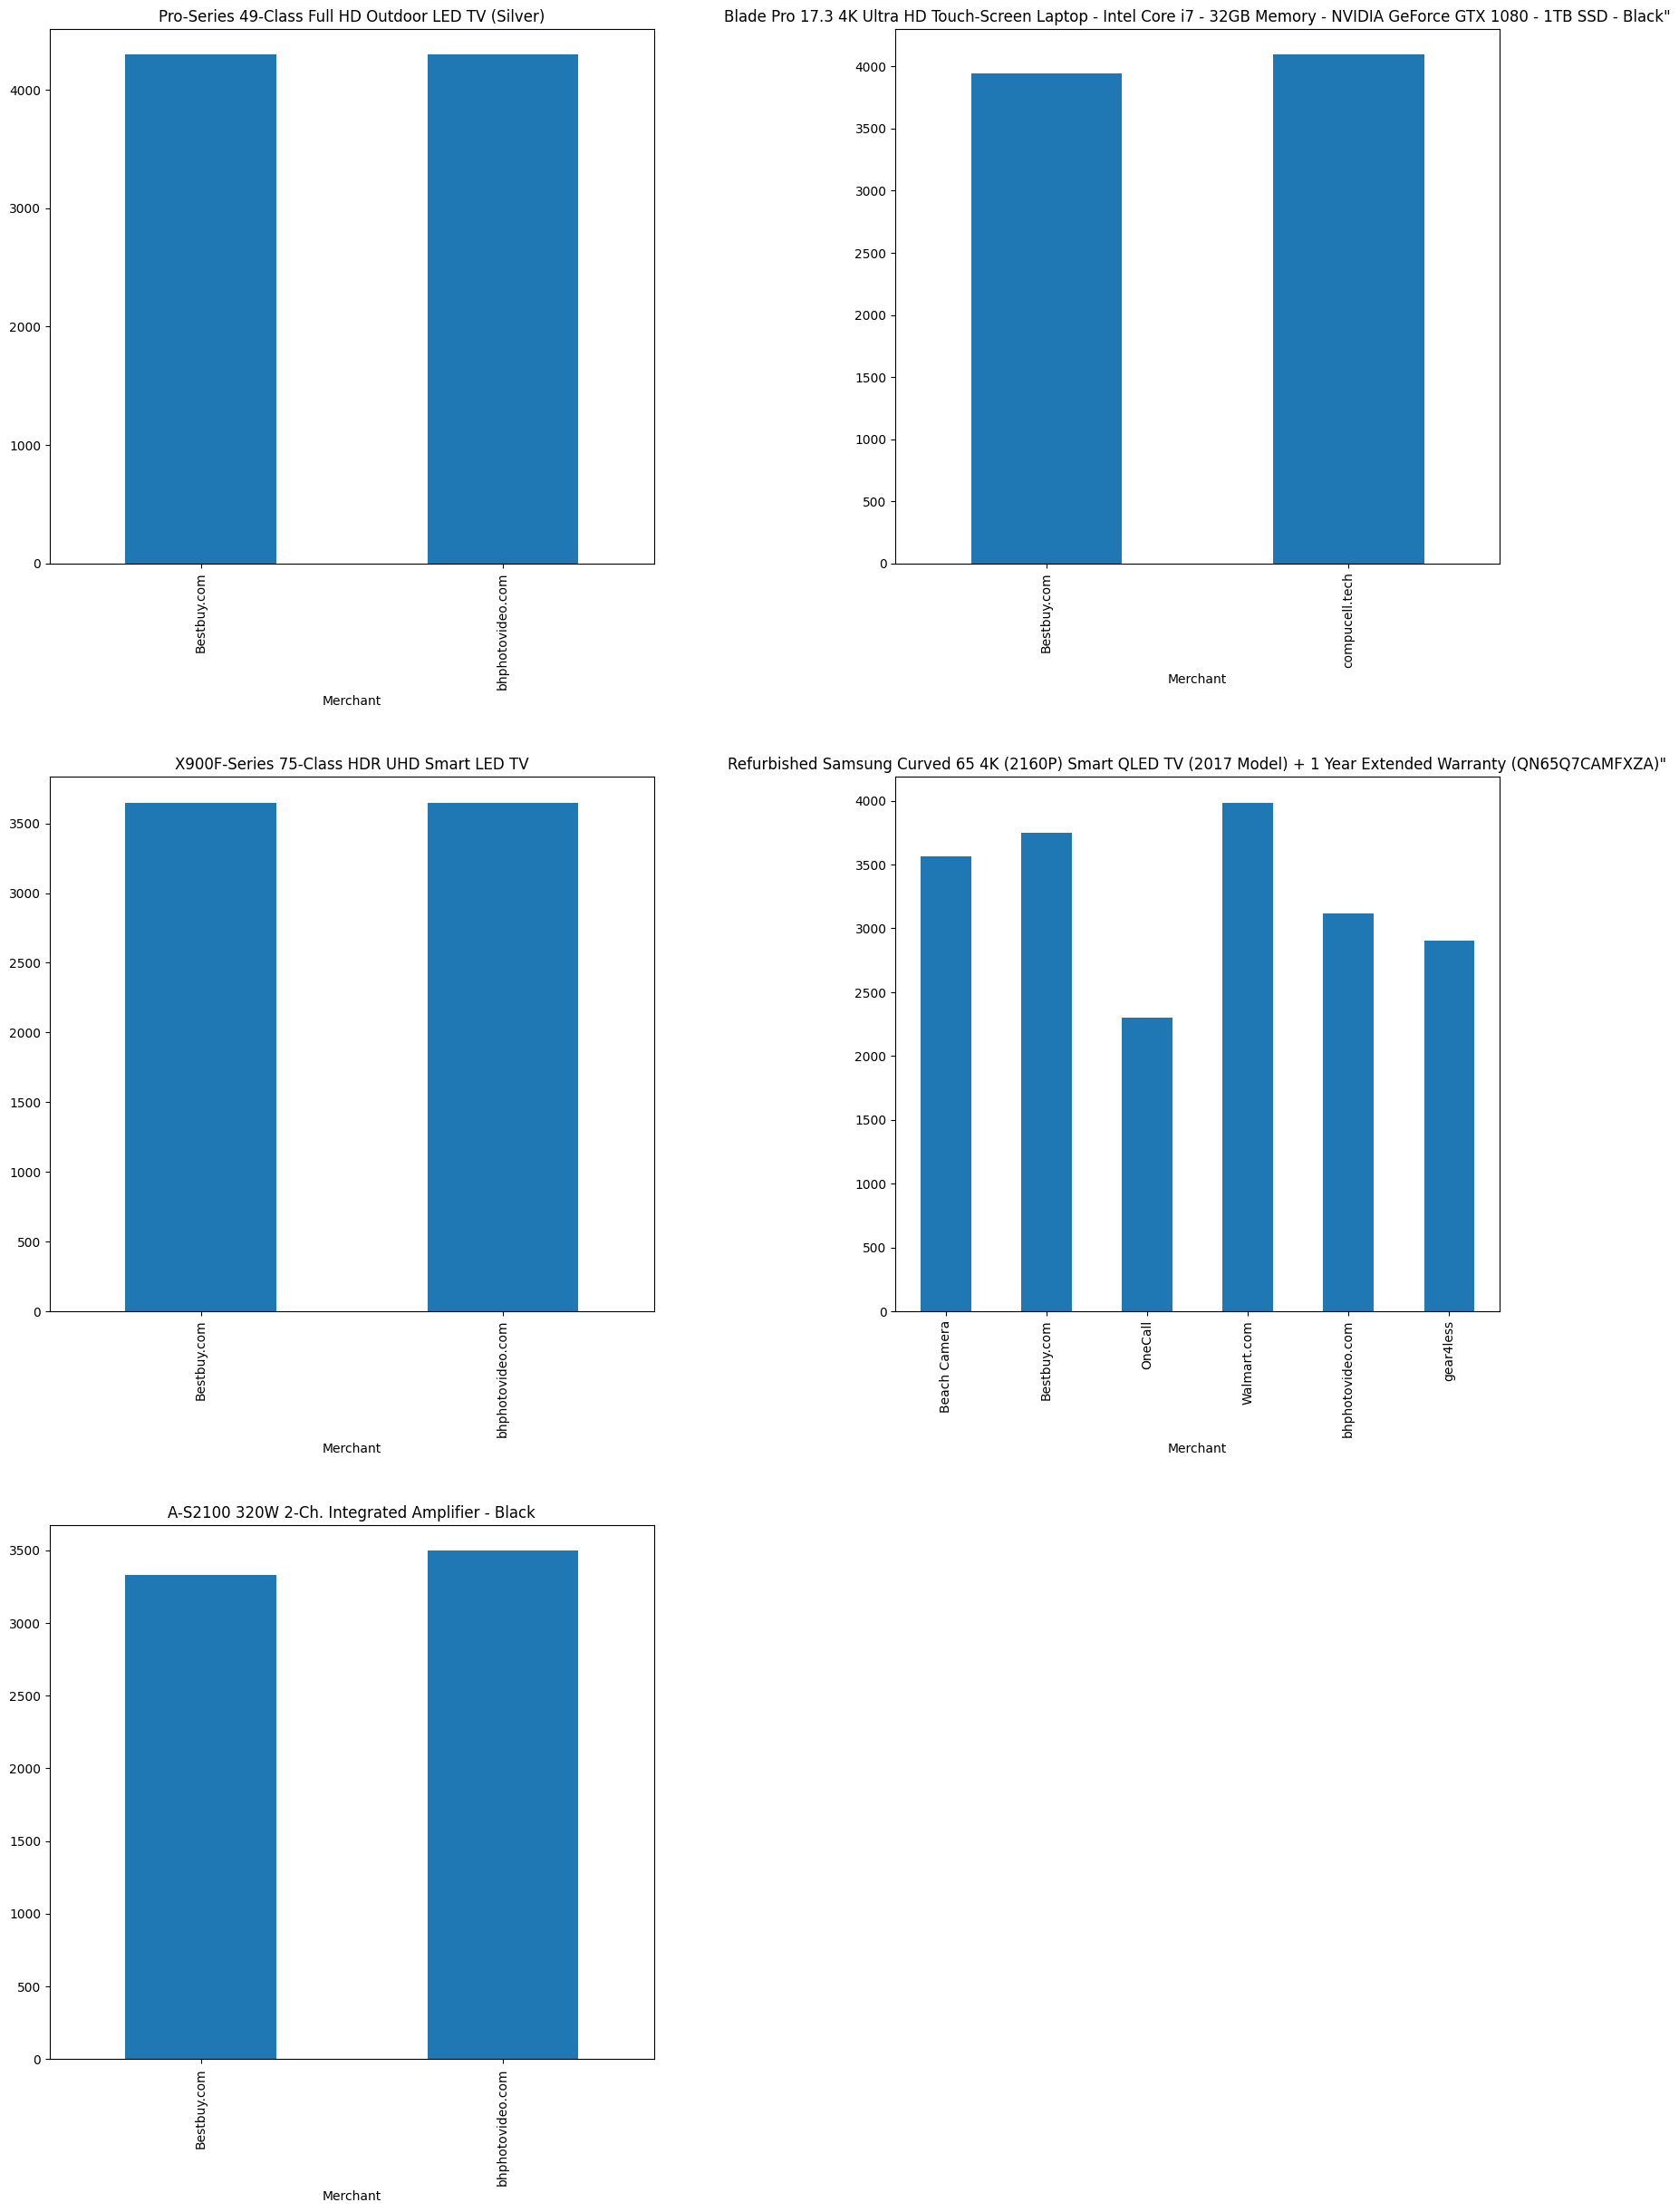

In [132]:
fig, ax = plt.subplots(3, 2, figsize=(20, 28))  # 2x2 grid for 4 plots

# Plot the first four products
competitive_prices['competitive_pr0'].plot.bar(y='Average_Price', use_index=True, title=prduct_top[0], ax=ax[0, 0])
competitive_prices['competitive_pr1'].plot.bar(y='Average_Price', use_index=True, title=prduct_top[1], ax=ax[0, 1])
competitive_prices['competitive_pr2'].plot.bar(y='Average_Price', use_index=True, title=prduct_top[2], ax=ax[1, 0])
competitive_prices['competitive_pr3'].plot.bar(y='Average_Price', use_index=True, title=prduct_top[3], ax=ax[1, 1])
competitive_prices['competitive_pr4'].plot.bar(y='Average_Price', use_index=True, title=prduct_top[4], ax=ax[2, 0])

# Remove the last empty axis (bottom right plot)
fig.delaxes(ax[2, 1])

# Adjust layout
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

plt.show()

Consistent Pricing: For most products, there is little to no price variation between merchants, indicating that these products may have standardized pricing across different platforms.
Price Variation: The only product that shows significant price variation is the "Refurbished Samsung Curved 65" 4K QLED TV," with a difference of around $1,200 between the lowest and highest prices across merchants.
This analysis suggests that consumers might not need to shop around for most of these products, except for the one where there is a clear price difference.



lets see how much sales done or sales proportion from isSale column¶

In [133]:
# sales level
def rate(data):
    total_sales = sum(df1['Average_Price'])

    # multimedia
    mutipledia = data.loc[(data['primaryCategories']=='Multimedia Electronics') |(data['isSale']==1)]
    sales = sum(mutipledia['Average_Price']) / total_sales
    #Auto Electronics
    mutipledia1 = data.loc[(data['primaryCategories']=='Auto Electronics') |(data['isSale']==1)]
    sales1 =  sum(mutipledia1['Average_Price'])/ total_sales
    # 'Computers'
    mutipledia2 = data.loc[(data['primaryCategories']=='Computers') |(data['isSale']==1)]
    sales2 =  sum(mutipledia2['Average_Price'])/ total_sales

    print(f"Multimedia Electronics Sale: {sales*100:.2f}\nAuto Electronics: {sales1*100:.2f}\nComputers: {sales2*100:.2f}")

rate(df1)



Multimedia Electronics Sale: 99.96
Auto Electronics: 34.18
Computers: 34.22


How does the product condition affect the pricing strategy of a product? we are going to make use of known Conditional Density plot

In [134]:
df1.columns

Index(['MaxPrice', 'MinPrice', 'Availability', 'Condition', 'Currency',
       'DateSeen', 'isSale', 'Merchant', 'Shipping', 'Brand', 'Categories',
       'DateAdded', 'DateUpdated', 'Name', 'primaryCategories', 'Weight',
       'seenTotalDays', 'seenTotalYears', 'Average_Price'],
      dtype='object')

<Axes: xlabel='MaxPrice', ylabel='Density'>

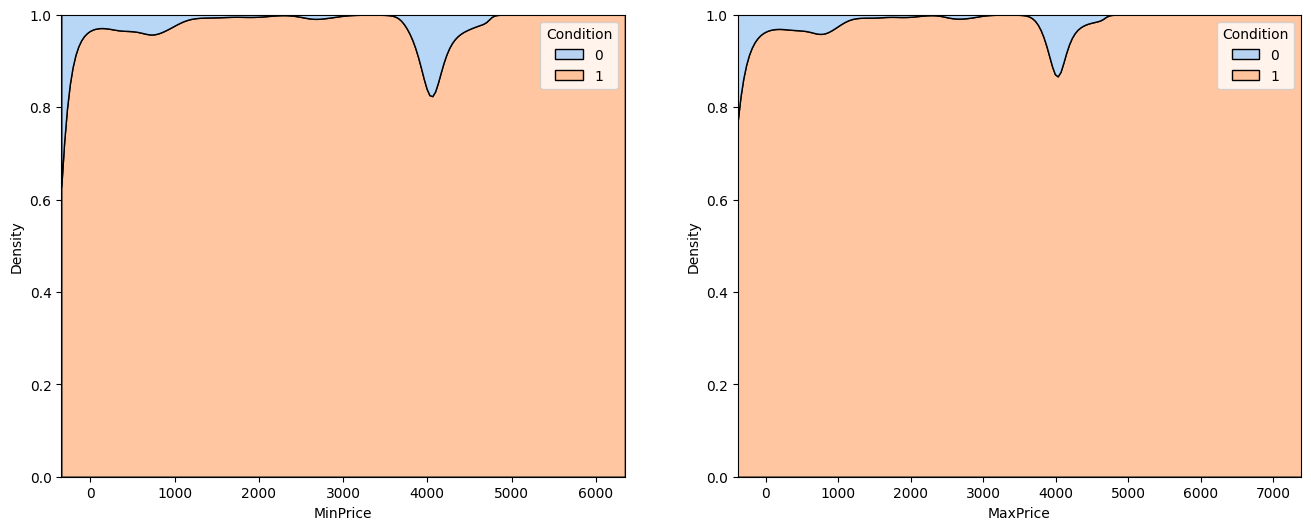

In [135]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
data = df1[['MinPrice', 'MaxPrice', 'Condition']]
sns.kdeplot(data=data, x='MinPrice', hue='Condition', multiple='fill', ax=ax[0],palette="pastel")
sns.kdeplot(data=data, x='MaxPrice', hue='Condition', multiple='fill', ax=ax[1],palette="pastel")

Old products which occupy 20% of the products being sold are being sold between $4000min_price to $4500 max_price
We can see a sudden jump in prices in old products at 4000 but unfortunately this are just outliers and small numnber of products are present in that price range

In [136]:
df1[(df1['MinPrice']>3900) & (df['MinPrice']<4100)] # 1428 is the outlier behind that sudden jump

,MaxPrice,MinPrice,Availability,Condition,Currency,DateSeen,isSale,Merchant,Shipping,Brand,Categories,DateAdded,DateUpdated,Name,primaryCategories,Weight,seenTotalDays,seenTotalYears,Average_Price
1421,3959.99,3959.99,1,1,USD,2017-07-09 01:00:00+00:00,1,Bestbuy.com,1,Razer,"Computers/Tablets & Networking,Computers & Acc...",2017-05-22 07:36:58+00:00,2018-06-13 19:39:16+00:00,Blade Pro 17.3 4K Ultra HD Touch-Screen Laptop...,Multimedia Electronics,7.69,1043 days 12:00:00,2.833333,3959.990
1428,3989.99,3989.99,1,0,USD,2017-08-28 11:00:00+00:00,1,compucell.tech,0,Razer,"Computers/Tablets & Networking,Computers & Acc...",2017-05-22 07:36:58+00:00,2018-06-13 19:39:16+00:00,Blade Pro 17.3 4K Ultra HD Touch-Screen Laptop...,Multimedia Electronics,7.69,1093 days 22:00:00,2.916667,3989.990
2290,4999.99,4096.00,0,1,USD,2017-11-08 17:00:00+00:00,1,Beach Camera,1,Sony,"TVs & Electronics,4K Ultra HD TVs,TV, Video & ...",2017-04-04 09:37:00+00:00,2018-06-13 19:50:10+00:00,55 Class - OLED - A1E Series - 2160p - Smart -...,Multimedia Electronics,63.50,1166 days 04:00:00,3.166667,4547.995
2297,3999.99,3999.99,1,1,USD,2017-05-31 16:00:00+00:00,0,Bestbuy.com,0,Sony,"TVs & Electronics,4K Ultra HD TVs,TV, Video & ...",2017-04-04 09:37:00+00:00,2018-06-13 19:50:10+00:00,55 Class - OLED - A1E Series - 2160p - Smart -...,Multimedia Electronics,63.50,1005 days 03:00:00,2.750000,3999.990


 Is there a correlation between the prices.dateSeen of a product and its dynamic pricing across merchants?

In [138]:
corr_df = sub_df.corr()
corr_df['Average_Price'].sort_values(ascending=False)



Average_Price     1.000000
MaxPrice          0.993414
MinPrice          0.991700
isSale            0.158451
Condition         0.051019
seenTotalDays     0.033715
seenTotalYears    0.031090
Availability      0.020956
Shipping         -0.107789
Name: Average_Price, dtype: float64

In [144]:
# prices among merchant
top5_merchant = df1.groupby('Merchant')['Average_Price'].agg(sum).sort_values(ascending=False).head(5)



C:\Users\User\AppData\Local\Temp\ipykernel_6432\927191021.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  top5_merchant = df1.groupby('Merchant')['Average_Price'].agg(sum).sort_values(ascending=False).head(5)


In [145]:
merchant_= df1[df1['Merchant'].isin(list(top5_merchant.index))].groupby('Merchant')['Average_Price']
merchant_.first()

Merchant
Beach Camera        549.000
Bestbuy.com         104.990
Walmart.com          66.995
bhphotovideo.com    149.950
gear4less           294.950
Name: Average_Price, dtype: float64

Merchant
Beach Camera        Axes(0.125,0.11;0.775x0.77)
Bestbuy.com         Axes(0.125,0.11;0.775x0.77)
Walmart.com         Axes(0.125,0.11;0.775x0.77)
bhphotovideo.com    Axes(0.125,0.11;0.775x0.77)
gear4less           Axes(0.125,0.11;0.775x0.77)
Name: Average_Price, dtype: object

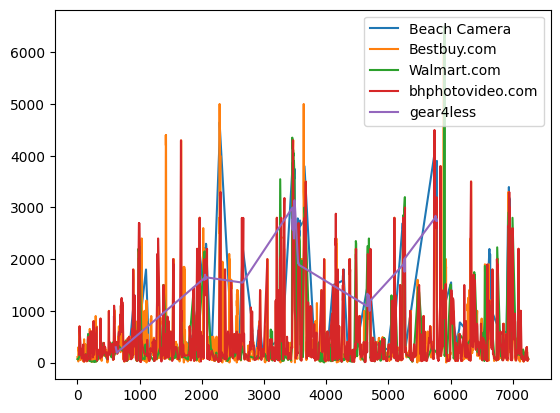

In [146]:
merchant_.plot(legend=True)